In [1]:
### Stuff one needs
#! pip install SoundFile
#! pip install pandas
#! pip install torchaudio
#! pip install matplotlib
#! pip install pyaudio 
# !pip install pydub 

In [2]:
# Imports
import wave
import tarfile

# As
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# From
from pathlib import Path
from pydub import AudioSegment

# Pytorch
import torchaudio

# Internals|helpers
from helpers import play_audio, extract_metadata 

d:\code\dementiakiller\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
d:\code\dementiakiller\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# CONFIG
COMBINED = False # Keep False, a tool to combine audio recordings for testing purposes only

FILE = Path('LJ025-0076.wav')
FILE2 = Path('LJ025-0073.wav')
FOLDER = Path('data/LJSpeech-1.1/wavs')

# Set default stuff 
torchaudio.set_audio_backend("soundfile") 

In [4]:
# Extract data from LJSpeech (https://keithito.com/LJ-Speech-Dataset/)
if FOLDER.is_dir() == False: 
    with tarfile.open("./data/LJSpeech-1.1.tar.bz2", "r:bz2") as tar:
        tar.extractall("data/")

In [5]:
# Looking up the data from dataset
df_metadata = extract_metadata()
df_metadata.head()

,filenames,text,text2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...


In [6]:
charset = []
for text in df_metadata['text']:
    for char in text:
        charset.append(char)
        charset = list(dict.fromkeys(charset))

charset = ''.join(sorted(charset))
print(charset)

 !"$&'(),-.0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]abcdefghijklmnopqrstuvwxyz|£àâèéêü’“”


In [7]:
# Look into the data
characters_max = np.max([len(x) for x in df_metadata['text']])
print(f'Max characters: {characters_max}')
print('Max length for LJSpeech-1.1: 1114') # hardcoded

Max characters: 331
Max length for LJSpeech-1.1: 1114


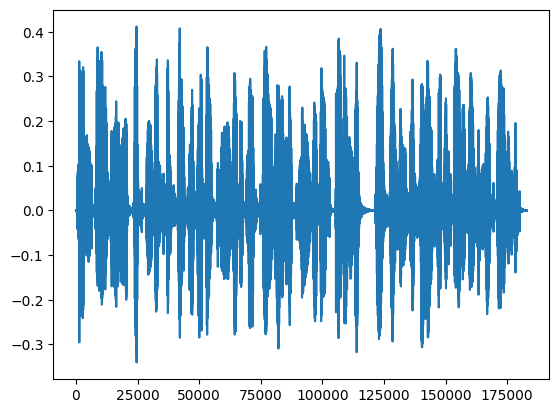

In [8]:
# Read in data an look at waveform
waveform, sample_rate = torchaudio.load(FOLDER / FILE)
waveform_np = waveform.numpy()
plt.plot(np.arange(waveform_np.shape[1]),waveform_np[0]);

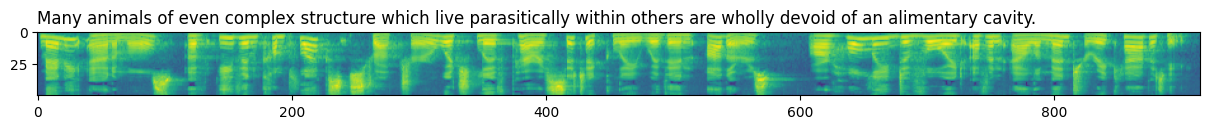

In [9]:
# Create spectrogram
transform = torchaudio.transforms.MelSpectrogram(sample_rate, n_mels=50)
mel_specgram = transform(waveform)

# Extract text from corresponding text TODO: Improve this hax
idx = [[idx,x] for idx, x in enumerate(df_metadata['filenames']) if FILE.stem in x]
df_sample = df_metadata.iloc[idx[0][0]]

# Plot spectrogram
fig = plt.figure(figsize=(15, 10))
enhanced = np.log(mel_specgram[0])
plt.title(df_sample['text'], loc='left')
plt.imshow(enhanced, cmap = 'viridis');

In [10]:
# Play the audio file
f = wave.open(str(FOLDER / FILE),"rb")  
play_audio(f) 

if COMBINED == True:
    wav_1 = AudioSegment.from_wav(str(FOLDER / FILE))
    wav_2 = AudioSegment.from_wav(str(FOLDER / FILE2))

    combined_sounds = wav_1 + wav_2
    combined_sounds.export("data//hax.wav", format="wav")
    f_combined = wave.open("data/hax.wav","rb")   
    
    play_audio(f_combined)  

In [11]:
# Slow way of finding approximately the the longest audio file

HAX = False

if HAX:

    files = list(Path(FOLDER).glob('*.wav'))

    audio_length = []
    for file in files:
        waveform, sample_rate = torchaudio.load(file)
        audio_length.append(waveform.shape)

    print(np.max(audio_length))

# 222621


In [12]:
# 
FILE_N = 505
files = list(Path(FOLDER).glob('*.wav'))
file = files[FILE_N]
f = wave.open(str(file),"rb")  
play_audio(f) 